In [1]:
import numpy as np
import pandas as pd
import PIL as pl
import cv2 as cv
import pytesseract as ts

import os
from glob import glob
# from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Get all png images inside ./images directory
imgPaths = glob('./images/*.png')

In [3]:
imgPaths

['./images/img-01.png',
 './images/img-04.png',
 './images/img-03.png',
 './images/img-02.png']

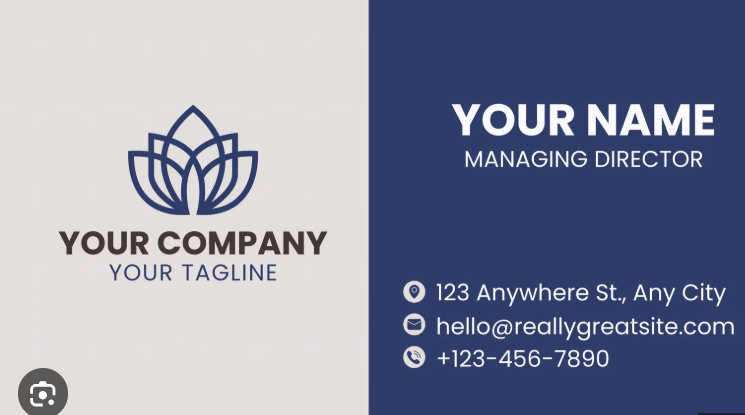

In [4]:
# Pillow
img_index = 2
img_pl = pl.Image.open(imgPaths[img_index])
img_pl

In [5]:
# OpenCV
img_cv = cv.imread(imgPaths[img_index])
# cv.startWindowThread()
# cv.imshow('Business Card', img_cv)
# cv.waitKey(0)
# cv.destroyAllWindows()

In [6]:
text_pl = ts.image_to_string(img_pl)
print(text_pl)

YOUR NAME

MANAGING DIRECTOR

YOUR COMPANY
YOUR TAGLINE

© 123 Anywhere St, Any City
O hello@reallygreatsite.com
® +123-456-7890




In [7]:
# unreadable data:
data = ts.image_to_data(img_pl)
# readable data:
dataList = list(map(lambda x: x.split('\t'),data.split('\n')))
dataList

[['level',
  'page_num',
  'block_num',
  'par_num',
  'line_num',
  'word_num',
  'left',
  'top',
  'width',
  'height',
  'conf',
  'text'],
 ['1', '1', '0', '0', '0', '0', '0', '0', '745', '415', '-1', ''],
 ['2', '1', '1', '0', '0', '0', '452', '104', '262', '32', '-1', ''],
 ['3', '1', '1', '1', '0', '0', '452', '104', '262', '32', '-1', ''],
 ['4', '1', '1', '1', '1', '0', '452', '104', '262', '32', '-1', ''],
 ['5',
  '1',
  '1',
  '1',
  '1',
  '1',
  '452',
  '104',
  '122',
  '32',
  '91.389542',
  'YOUR'],
 ['5',
  '1',
  '1',
  '1',
  '1',
  '2',
  '588',
  '104',
  '126',
  '31',
  '91.548103',
  'NAME'],
 ['2', '1', '2', '0', '0', '0', '466', '151', '236', '16', '-1', ''],
 ['3', '1', '2', '1', '0', '0', '466', '151', '236', '16', '-1', ''],
 ['4', '1', '2', '1', '1', '0', '466', '151', '236', '16', '-1', ''],
 ['5',
  '1',
  '2',
  '1',
  '1',
  '1',
  '466',
  '151',
  '121',
  '16',
  '92.852219',
  'MANAGING'],
 ['5',
  '1',
  '2',
  '1',
  '1',
  '2',
  '596',
  '15

In [8]:
df = pd.DataFrame(dataList[1:],columns=dataList[0])
df.head(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   level      39 non-null     object
 1   page_num   38 non-null     object
 2   block_num  38 non-null     object
 3   par_num    38 non-null     object
 4   line_num   38 non-null     object
 5   word_num   38 non-null     object
 6   left       38 non-null     object
 7   top        38 non-null     object
 8   width      38 non-null     object
 9   height     38 non-null     object
 10  conf       38 non-null     object
 11  text       38 non-null     object
dtypes: object(12)
memory usage: 3.8+ KB


In [9]:
df.dropna(inplace=True) # Drop empty values and rows
col_int = ['level','page_num','block_num','par_num','line_num','word_num','left','top','width','height','conf']
#df.info()
df.dtypes

level        object
page_num     object
block_num    object
par_num      object
line_num     object
word_num     object
left         object
top          object
width        object
height       object
conf         object
text         object
dtype: object

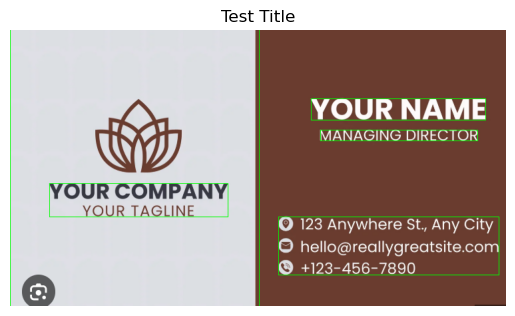

In [13]:
image = img_cv.copy()
level = 'word'
for l,x,y,w,h,c,t in df[['level','left','top','width','height','conf','text']].values:
    # convert data (str to number)
    l=int(l)
    x=int(x)
    y=int(y)
    w=int(w)
    h=int(h)
    c=float(c)
    
    if level == 'page':
          if l == 1:
                cv.rectangle(image,(x,y),(x+w,y+h),(0,0,0,),2)
          else:
            continue
            
    elif level == 'block':
          if l == 2:
                cv.rectangle(image,(x,y),(x+w,y+h),(255,0,0,),1)
          else:
            continue
            
    elif level == 'paragraph':
          if l == 3:
                cv.rectangle(image,(x,y),(x+w,y+h),(0,255,0,),1)
          else:
            continue
            
    elif level == 'line':
          if l == 4:
                cv.rectangle(image,(x,y),(x+w,y+h),(255,0,51,),1)
          else:
            continue
            
    elif level == 'word':
          if l == 5:
                cv.rectangle(image,(x,y),(x+w,y+h),(0,0,255,),1)
                # cv.putText(image,t,(x,y),cv.FONT_HERSHEY_COMPLEX_SMALL,1,(0,255,0),1)
                cv.putText(image,t,(x,y), cv.FONT_HERSHEY_COMPLEX,0.5,(0,0,0),2,cv.LINE_AA)
                cv.putText(image,t,(x,y), cv.FONT_HERSHEY_COMPLEX,0.5,(250,250,250),1,cv.LINE_AA)

        
          else:
            continue





from matplotlib import pyplot as plt
def show_image(image, title="Test Title", gray=False, axis="off"):
    if gray:
        plt.imshow(image, cmap="gray")           # نمایش تصویر با نقشه‌ی رنگ خاکستری
    else:
        plt.imshow(image)                        # نمایش تصویر
    plt.axis(axis)                              # حذف محورهای اطراف تصویر
    plt.title(title)                             # عنوان انگلیسی (برای جلوگیری از مشکل حروف فارسی)
    plt.show()                                   # نمایش نهایی







show_image(image)


# cv.imshow("bounding box",image)
# cv.waitKey(0)
# cv.destroyAllWindows()
# cv.waitKey(1)